**DS 3010: Applied Data Modeling and Predictive Analysis**

# Lab 03 – Linear Perceptron Classifier

## 1. Get and visualize the data to gain insights

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join("datasets", "german_credit_data.csv")
data = pd.read_csv(data_path)

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Text(0, 0.5, 'Count')

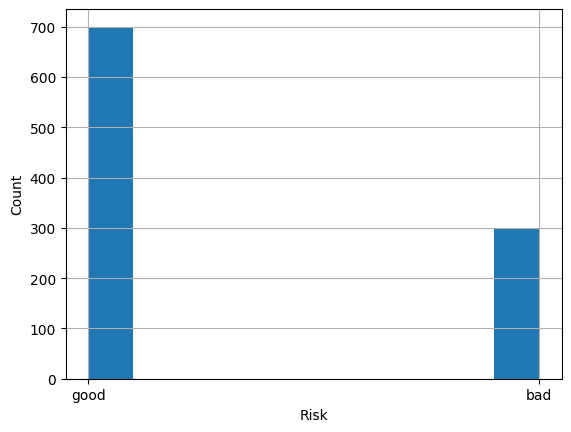

In [4]:
import matplotlib.pyplot as plt
data['Risk'].hist()
plt.xlabel('Risk')
plt.ylabel('Count')

## 2. Separate the data into features (x) and label (y) such that

- y is a binary target, indicating whether risk is "good"
- x contains the following numerical columns: Age, Job, Credit amount, Duration.

In [5]:
attributes = ['Credit amount', 'Duration']

x = data[attributes]

y = (data['Risk'] == 'good')

** Task 1:** Use scikit-learn to train your model with LinearPerceptron. [10 points]

In [7]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(x, y) # train the model

Perceptron()

**Task 2:** Use matplotlib to visualize the data. Use 'Credit amount' as x-axis and 'Duration' as y-axis and assign different colors for data with different labels. Also plot your model decision boundary. [10 points]

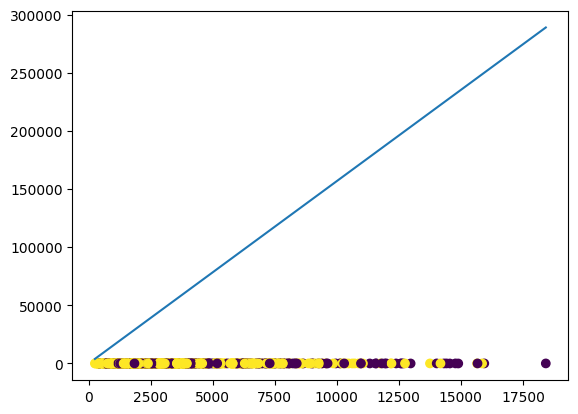

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x['Credit amount'], x['Duration'], c=y)  # Scatter plot of Credit amount vs Duration

import numpy as np
w = model.coef_[0]  # Get the coefficients of the trained model
b = model.intercept_  # Get the intercept of the trained model

x_plot = np.linspace(x['Credit amount'].min(), x['Credit amount'].max(), 300)
y_plot = -(w[0]/w[1])*x_plot - b/w[1]  # Calculate corresponding y values for the decision boundary

plt.plot(x_plot, y_plot, label="Decision Boundary")  # Plot the decision boundary line


In [17]:
count_0, count_1 = 0, 0
for idx in range(1000):
    feat = x.iloc[[idx], :]
    pred = model.predict(feat)
    if pred == True:
        count_1 += 1
    else:
        count_0 += 1
count_0, count_1 # output te counts for class 0 and class 1 predictions

(0, 1000)

**Task 3:** Report the training accuracy. [10 points]

In [18]:
accuracy = model.score(x, y)
accuracy # output the accuracy of the model

0.7